## for # SayNoToWar

#### We scraped for the hashatg - #SayNoToWar and were able to successfully scrape 13000 tweets.

In [1]:
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("SayNoToWar.csv")
df.head()

,Unnamed: 0,retweet,favorite,inreplyto,friends,screen_name,followers,listed,retweeted_user,mentioned_user,mentions_sent,retweets_sent,content_type,date,country
0,0,38,0,NaN,561,imshee67,9924,18,TahirMujtaba_,['TahirMujtaba_'],0,13,RT,2019-02-25,pakistan
1,1,1,0,NaN,24,SyedHas70245685,0,0,Shaistayousuff,['Shaistayousuff'],0,14,RT,2019-02-25,pakistan
2,2,38,0,NaN,573,tabankhamosh,1064,11,TahirMujtaba_,['TahirMujtaba_'],0,13,RT,2019-02-25,pakistan
3,3,1,5,NaN,155,Shaistayousuff,6295,4,NaN,[],0,0,Tweet,2019-02-25,No location
4,4,0,1,NaN,293,AlvinaSajidK,808,5,NaN,[],0,0,Tweet,2019-02-25,pakistan


## Creating Network Features

In [3]:
df = df.sort_values(by=['screen_name'])

In [4]:
df['edge_value'] = 1

In [13]:
df = df[(df['content_type'] == "RT")]

In [14]:
df.shape

(9681, 16)

In [48]:
# creating new dataframe with just users and country
users_df = df[['screen_name','country']]
print(users_df.shape)
users_df.drop_duplicates(subset='screen_name',inplace=True)
print(users_df.shape)

(9681, 2)
(7314, 2)


In [21]:
g = nx.from_pandas_edgelist(df, source='screen_name', target='retweeted_user',edge_attr = 'edge_value',create_using=nx.DiGraph())
#g = nx.DiGraph()
#nx.draw(g)

In [9]:
degree = pd.DataFrame(nx.degree_centrality(g),index=['degree']).T.reset_index()
closeness = pd.DataFrame(nx.closeness_centrality(g),index=['closeness']).T.reset_index()
betweenness = pd.DataFrame(nx.betweenness_centrality(g),index=['betweenness']).T.reset_index()

In [10]:
#merging the dataset for scoring
df_m1 = df.groupby(['screen_name'])['mentions_sent','retweets_sent'].sum()
df_m2 = df.drop_duplicates(['screen_name'])[['screen_name','followers']]
df_m3 = pd.merge(df_m1,df_m2,how='inner',on='screen_name')

In [11]:
measures = degree.merge(closeness,on='index').merge(betweenness,on='index')
df_m4 = pd.merge(df_m3,measures,how='inner',left_on='screen_name',right_on = 'index')
df_m4.head()

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
0,000Hansa,0,11,136,000Hansa,0.000092,0.0,0.0
1,007tamizhan,0,11,165,007tamizhan,0.000092,0.0,0.0
2,01101100A,0,15,191,01101100A,0.000092,0.0,0.0
3,01Gujjar,0,10,305,01Gujjar,0.000092,0.0,0.0
4,04Hamna,0,10,180,04Hamna,0.000092,0.0,0.0


In [13]:
df_m4.sort_values(by=['degree'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness
630,ArmeenaRK,0,0,170209,ArmeenaRK,0.012983,0.012892,9.493021e-07
2256,KhaleejMag,0,20,72013,KhaleejMag,0.012431,0.012247,0.000000e+00
4018,SdqJaan,0,0,79523,SdqJaan,0.009761,0.009669,8.232373e-07
3190,OfficialHanzala,0,0,51233,OfficialHanzala,0.006906,0.006865,5.356342e-07
3614,Razarumi,0,0,407408,Razarumi,0.006630,0.006549,4.412911e-07
3744,SNangyale,14,906,1956,SNangyale,0.006446,0.000000,0.000000e+00
5715,beenasarwar,0,12,213597,beenasarwar,0.005801,0.005731,8.734088e-07
8560,schaheid,0,11,3312,schaheid,0.005801,0.005617,9.723386e-07
287,AemunSh3rwanee_,0,11,17964,AemunSh3rwanee_,0.005433,0.004499,1.040883e-06
1455,FayyazShots,0,0,110762,FayyazShots,0.005341,0.005249,4.451841e-07


In [16]:
df_m4.sort_values(by=['closeness'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
630,ArmeenaRK,0,0,170209,ArmeenaRK,0.012983,0.012892,9.493021e-07,18971.504875
2256,KhaleejMag,0,20,72013,KhaleejMag,0.012431,0.012247,0.000000e+00,8031.435042
4018,SdqJaan,0,0,79523,SdqJaan,0.009761,0.009669,8.232373e-07,8863.820153
3190,OfficialHanzala,0,0,51233,OfficialHanzala,0.006906,0.006865,5.356342e-07,5710.671918
3614,Razarumi,0,0,407408,Razarumi,0.006630,0.006549,4.412911e-07,45409.242877
5715,beenasarwar,0,12,213597,beenasarwar,0.005801,0.005731,8.734088e-07,23810.245655
8560,schaheid,0,11,3312,schaheid,0.005801,0.005617,9.723386e-07,372.056369
1455,FayyazShots,0,0,110762,FayyazShots,0.005341,0.005249,4.451841e-07,12345.658177
3975,SaraNadeemSidd1,0,0,320,SaraNadeemSidd1,0.004880,0.004803,2.948145e-07,36.008219
1713,Hassanrazaglt,0,0,233,Hassanrazaglt,0.004236,0.004615,3.116289e-07,26.311368


In [17]:
df_m4.sort_values(by=['betweenness'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
721,Asmayyayy,1,98,8359,Asmayyayy,0.002670,0.001766,2.259839e-06,955.066678
4575,Tooba_Sd,8,32,11362,Tooba_Sd,0.004696,0.004328,1.562384e-06,1275.707404
287,AemunSh3rwanee_,0,11,17964,AemunSh3rwanee_,0.005433,0.004499,1.040883e-06,2005.139717
8560,schaheid,0,11,3312,schaheid,0.005801,0.005617,9.723386e-07,372.056369
630,ArmeenaRK,0,0,170209,ArmeenaRK,0.012983,0.012892,9.493021e-07,18971.504875
5715,beenasarwar,0,12,213597,beenasarwar,0.005801,0.005731,8.734088e-07,23810.245655
4018,SdqJaan,0,0,79523,SdqJaan,0.009761,0.009669,8.232373e-07,8863.820153
1909,ImaginatorC,0,66,280,ImaginatorC,0.001657,0.001020,6.351697e-07,46.943885
2811,Momnaayaz,0,14,96,Momnaayaz,0.000460,0.000740,5.857048e-07,14.307007
1312,Engr_Naveed111,0,9,14566,Engr_Naveed111,0.001105,0.001020,5.681397e-07,1625.938779


In [ ]:
# asmayyayy - high betweeness
# ArmeenaRK - shows up in all 3 and has the high number of followers
# beenasawae - high number of followers

In [14]:
#creating score by using standardized estimates from 
df_m4['score'] = 0.341642509 +  0.11145805 * df_m4['followers'] + 0.189455669 * df_m4['mentions_sent'] + 0.233242245 * df_m4['retweets_sent'] 
+ 0.095579394 * df_m4['betweenness'] - 0.028622133 * df_m4['closeness']
df_m4.head()

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
0,000Hansa,0,11,136,000Hansa,0.000092,0.0,0.0,18.065602
1,007tamizhan,0,11,165,007tamizhan,0.000092,0.0,0.0,21.297885
2,01101100A,0,15,191,01101100A,0.000092,0.0,0.0,25.128764
3,01Gujjar,0,10,305,01Gujjar,0.000092,0.0,0.0,36.668770
4,04Hamna,0,10,180,04Hamna,0.000092,0.0,0.0,22.736514


In [15]:
df_m4.sort_values(by=['score'],ascending=False)[:10]

,screen_name,mentions_sent,retweets_sent,followers,index,degree,closeness,betweenness,score
3480,RT_com,0,0,2717067,RT_com,0.002302,0.002210,1.907932e-07,302839.331182
3634,RehamKhan1,0,10,2172384,RehamKhan1,0.001013,0.000921,7.631727e-08,242132.358556
3945,SanamBalochfans,0,0,1272291,SanamBalochfans,0.000737,0.000780,3.957192e-08,141807.415535
3614,Razarumi,0,0,407408,Razarumi,0.006630,0.006549,4.412911e-07,45409.242877
2344,KunwarMoeez,1,36,406497,KunwarMoeez,0.000276,0.000000,0.000000e+00,45316.290770
5715,beenasarwar,0,12,213597,beenasarwar,0.005801,0.005731,8.734088e-07,23810.245655
5117,abbasnasir59,0,8,204100,abbasnasir59,0.000092,0.000000,0.000000e+00,22750.795585
1408,FarhanKVirk,0,14,182075,FarhanKVirk,0.000184,0.000092,1.695939e-08,20297.331488
630,ArmeenaRK,0,0,170209,ArmeenaRK,0.012983,0.012892,9.493021e-07,18971.504875
5104,aartic02,0,15,152625,aartic02,0.000460,0.000368,3.391879e-08,17015.125157


In [26]:
df.shape

(13070, 16)

In [15]:
col1 = df['screen_name']
col2 = df['retweeted_user']
col3 = df['content_type']
network = pd.concat([col1, col2, col3], axis=1)


network.columns = ['User_A', 'User_B', 'Interaction']
network.head()

,User_A,User_B,Interaction
5967,000Hansa,nishantchat,RT
13018,007tamizhan,ShotDKuruvi,RT
3271,01101100A,TheGrumpyDoctor,RT
1816,01Gujjar,raheelrana,RT
10315,04Hamna,ZameerMaan,RT


In [16]:
all_people = list(network['User_A'].unique())
all_people = all_people + list(network['User_B'].unique())

In [17]:
print (len(all_people))
all_people = list(set(all_people))
print('Length after removing duplicates', len(all_people))

9252
Length after removing duplicates 9078


In [18]:
g1 = nx.Graph()

In [19]:
for k in all_people:
    g1.add_node(k)

In [20]:
for i in range(len(network)):
    g1.add_edge(network['User_A'].iloc[i], network['User_B'].iloc[i])

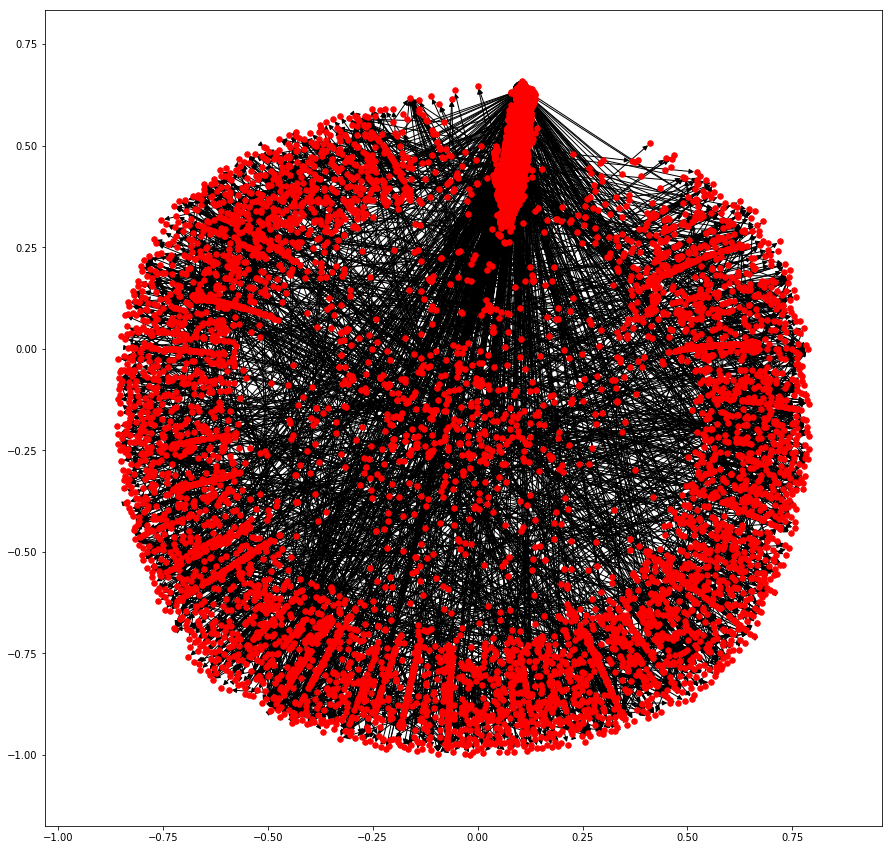

In [43]:
# plt.figure(1,figsize=(15,15)) 
# nx.draw_networkx(g1,with_labels = False, node_size = 30)
# plt.show()

# Experimenting with Cores and Cliques

In [21]:
list(nx.find_cliques(g1))

[['Khattak_83', 'khattak'],
 ['faryrana', 'DhanjeeKolhi'],
 ['faryrana', 'SdqJaan'],
 ['Muhamma49286303', 'abbasimukhtiar'],
 ['sanzpreet', 'saxenaamit_mca'],
 ['gully_point', 'skpkaruna'],
 ['sha_ham', 'sujith_JJSK'],
 ['SsamanJay', 'NusratBangash'],
 ['Aa86504076', 'sheikhwaleed15'],
 ['salmanzit', 'GulabJamunHigh'],
 ['UmarUbaidullah1', 'bushra_2010'],
 ['UmarUbaidullah1', 'Hassanrazaglt'],
 ['baigalyasini1', 'SNangyale'],
 ['baigalyasini1', 'Tuba64645203'],
 ['JadoonKaJunoon7', 'FayyazShots'],
 ['aaryamehta3', 'deepaknegi995'],
 ['MansoorBukhary', 'SSultanBukhari'],
 ['AsadAlamKhan1', 'Tarikkhattak'],
 ['ShahRukh_SaySs', 'SyedaMahinu'],
 ['KhanSilachi1', 'biya_bia'],
 ['KhanSilachi1', 'Sir_Dogar'],
 ['QaiserMehmoodW1', 'mabdullah2k19'],
 ['jbspeedster', 'MasalaBai'],
 ['s1saj', 'ChauhanZahid'],
 ['periyakulam', 'JK2107TW'],
 ['periyakulam', 'AnasKha98716966'],
 ['zei202', 'MJibranNasir'],
 ['theKapsology', 'indiantweeter'],
 ['theKapsology', 'vikasbha'],
 ['nichajune_', 'irichmilli

In [22]:
# remove the self loops

g1.remove_edges_from(nx.selfloop_edges(g1))

#let's find the cores
list(nx.k_core(g1))
#nx.core_number(g)

['RMA_in_DNA',
 'NisaRizwan',
 'drshahidalam',
 'TheRightful',
 'makfinance17',
 'faisal_naina',
 'SNangyale',
 'Rahim_Realist',
 'NimraIrfan01',
 '2_inocentboy',
 'AliKhawaja_',
 'SaraNadeemSidd1',
 'i_aliarif',
 'duuaax',
 'RabiaTabbassum',
 'Zaid_Saad10',
 'iSaadAwais22',
 'mahwashajaz_',
 'ArmeenaRK',
 'TheGrumpyDoctor',
 'hoemimvato',
 'bushra_2010',
 'FaisalH538',
 'SadiaTheSadia',
 'cr7izbest',
 'beenasarwar',
 'Adkhan94992729',
 'WajSKhan',
 'MariamNaqsh',
 'etanvir',
 'Woundedkashmir',
 'ijazkhan4545',
 'em_pukhtoon',
 'tammyhaq',
 'ImaginatorC',
 'Razarumi',
 'syedwaqasmunir']

In [23]:
# finding all users considered to have a core value
nx.core_number(g1)

{'Khattak_83': 1,
 'Muhamma49286303': 1,
 'faryrana': 2,
 'sanzpreet': 1,
 'gully_point': 1,
 'sha_ham': 1,
 'SsamanJay': 1,
 'Aa86504076': 1,
 'salmanzit': 1,
 'UmarUbaidullah1': 2,
 'baigalyasini1': 2,
 'JadoonKaJunoon7': 1,
 'aaryamehta3': 1,
 'MansoorBukhary': 1,
 'AsadAlamKhan1': 1,
 'ShahRukh_SaySs': 1,
 'KhanSilachi1': 2,
 'QaiserMehmoodW1': 1,
 'jbspeedster': 1,
 's1saj': 1,
 'periyakulam': 1,
 'zei202': 1,
 'theKapsology': 2,
 'nichajune_': 1,
 'ektaspace': 1,
 'G2unofficial': 1,
 'Nadeembaig3018': 1,
 'drrizwan252003': 1,
 'jog_ii': 1,
 'HowzzDJosh': 1,
 'Yousuf_J': 1,
 'HK__Malik': 1,
 'sohailstyle': 1,
 'maham2494': 1,
 'eyekhan': 1,
 'abhipal81735235': 1,
 'oye_atto': 1,
 'Nilotpal_Ghosh7': 1,
 'fsaleem440': 1,
 'Manikhattak9': 2,
 'bagaria_sanjay': 1,
 'MakhijaDarshan': 1,
 'Gaurav0644': 1,
 'Muhamma11907877': 1,
 'prismaticcolor': 1,
 'iamhussnain': 1,
 'spacemanxxx11': 1,
 'MirYasmin1': 1,
 'MJibranNasir': 2,
 'i_Nivedita': 1,
 'mehr_awais': 1,
 'Zubair_khan92': 1,
 'An

In [60]:
# finding users with the highest core value

d = {k: v for k, v in nx.core_number(g1).items() if v > 2}
core_df = pd.DataFrame()
core_df['user'] = d.keys()
core_df['core'] = d.values()
core_df = pd.merge(core_df, users_df, left_on='user', right_on='screen_name', how='inner')
core_df = core_df.drop('screen_name', axis=1)
print('number of cores of 4 value: ' + str(len(core_df)))

core_df

number of cores of 4 value: 119


,user,core,country
0,avengerstarkzz,3,No location
1,hammad87018650,3,No location
2,rehanmushtaq1,3,#karachi
3,hizbi_313,3,pakistan
4,MuhammadZafar,3,lahore
5,iam_fardeenh,3,bangaluru
6,2_inocentboy,4,pakistan
7,MrAli18108279,3,malaysia
8,SaffinaEllahi1,3,surrey uk
9,Woundedkashmir,4,india


In [53]:
core_df['country'].value_counts()

No location       8
pakistan          5
queer af 🏳️‍🌈     1
ma                1
ny                1
east              1
india             1
پاکستان           1
london/:lahore    1
hell in heaven    1
Name: country, dtype: int64

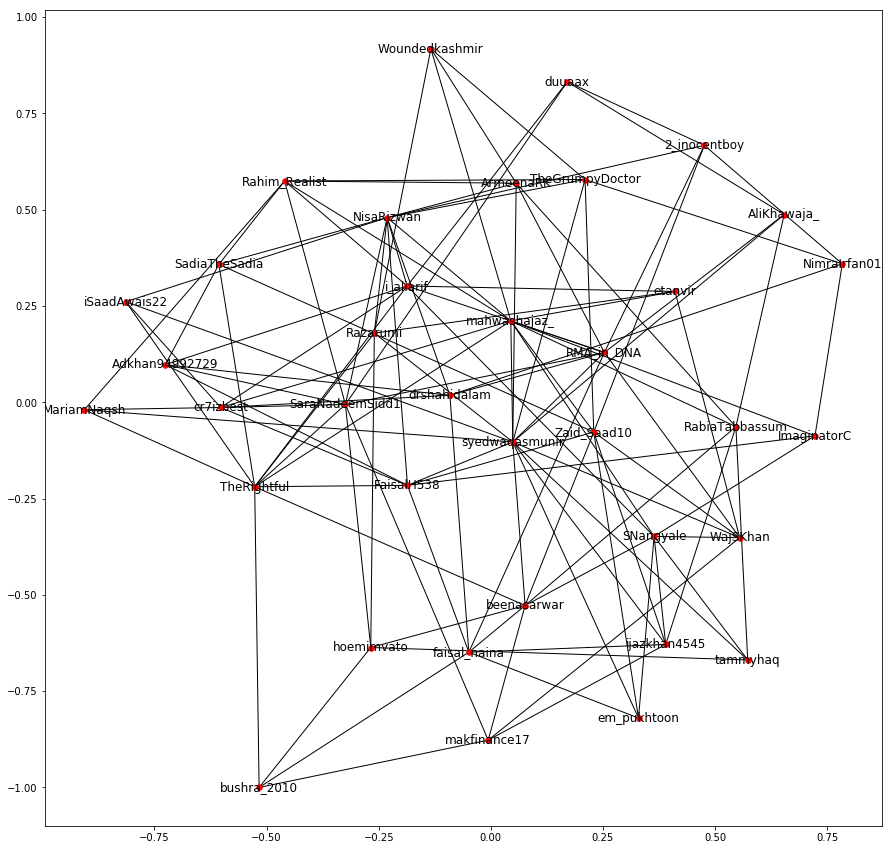

NameError: name 'fig' is not defined

In [54]:
# plotting the cores
plt.figure(1,figsize=(15,15)) 
nx.draw_networkx(nx.k_core(g1),with_labels = True, node_size = 30)
plt.show()
fig.savefig('SNTWcores.png')

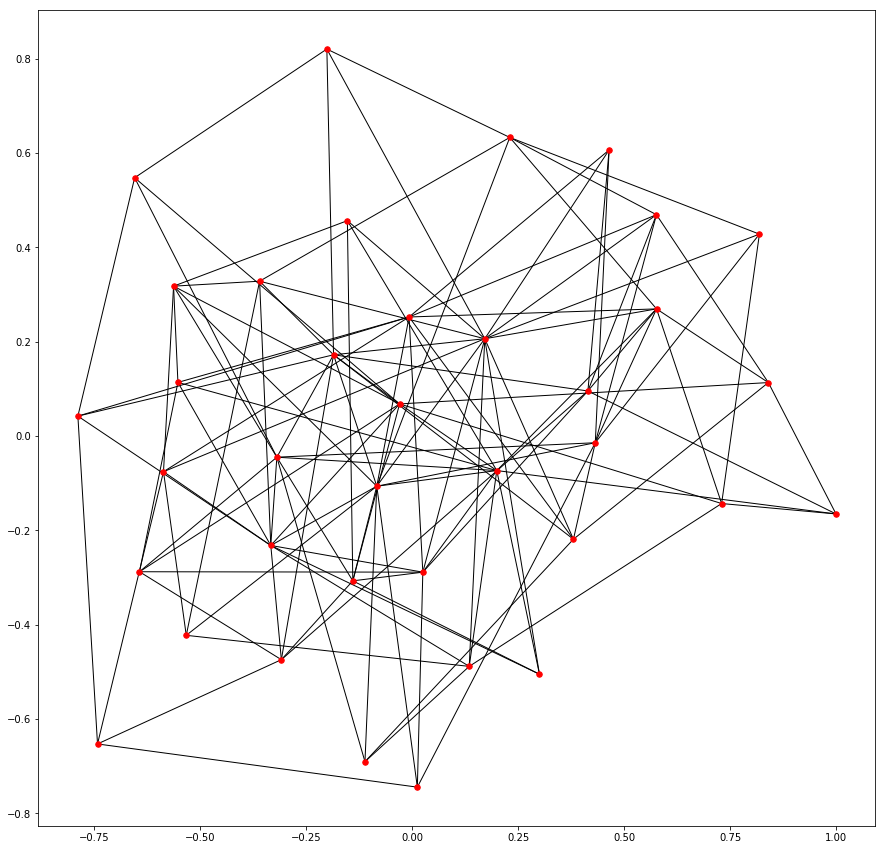

In [28]:
# plotting the cores
plt.figure(1,figsize=(15,15)) 
nx.draw_networkx(nx.k_core(g1),with_labels = False, node_size = 30)
plt.show()

In [33]:
#find edges that are within the 4-core (have 4 or more edges)
g1.remove_edges_from(nx.selfloop_edges(g1)) 

In [45]:
# find core with 5
g_4k_edges = nx.k_core(g1, k=5).edges()

#add edges to new graph
g_4k = nx.Graph()
g_4k.add_edges_from(g_4k_edges)

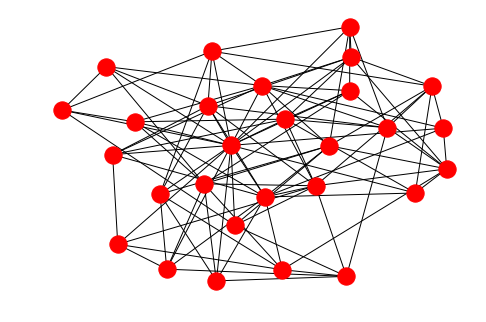

In [46]:
#plot k-core graph
nx.draw(g_4k)

## generating subgraphs using cliques

In [118]:
total_cores = nx.core_number(g1)
# max_cores = [kre for kre in total_cores if kre[1] >= 3]
len(total_cores)

10861

In [103]:
# the cliques with 4...looks more like 3 to me
list(cliques4)

[[nan, 'sabinerizwan', 'Asmayyayy', 'MSherdilkhan'],
 [nan, 'AmmadnaseerKhan', 'khawajaatteeq', 'SagrikaKissu'],
 [nan, 'mnMalhi', 'MariamNaqsh', 'syedwaqasmunir'],
 [nan, 'RMA_in_DNA', 'drshahidalam', 'faisal_naina'],
 [nan, 'RMA_in_DNA', 'aishaismad', 'ArifNasry'],
 [nan, 'RMA_in_DNA', 'syedwaqasmunir', 'ArmeenaRK'],
 [nan, 'RMA_in_DNA', 'syedwaqasmunir', 'OverLord_Xd'],
 [nan, 'RMA_in_DNA', 'syedwaqasmunir', 'EDREES_TAREEN'],
 [nan, 'tahirisdead', 'ptartzy', 'MatlabkuchB']]

In [104]:
#create subgraph of g from sufficiently large cliques
nodes = set(n for clq in cliques4 for n in clq)
h = g1.subgraph(nodes)

In [105]:
#drop nodes of h which have degrees less than 4
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 4]

In [106]:
#the desired graph k is subgraph of h with these nodes
k = h.subgraph(nodes)

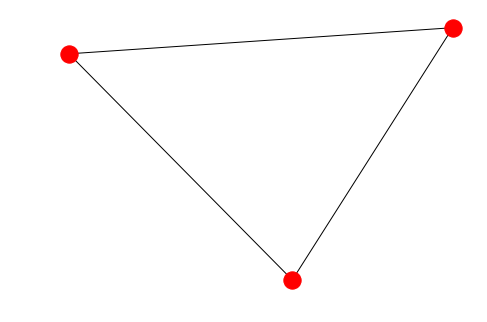

In [107]:
#draw graph
nx.draw(k)

In [57]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [58]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs



In [72]:
###### Check that there are 33 maximal cliques of size 3 in the graph T
print('Maximal clique of 3+ : ' + str(len(maximal_cliques(g1, 3))))
print('Maximal clique of 4+ : ' + str(len(maximal_cliques(g1, 4))))
print('Maximal clique of 5+ : ' + str(len(maximal_cliques(g1, 5))))

Maximal clique of 3+ : 319
Maximal clique of 4+ : 9
Maximal clique of 5+ : 0
